<a href="https://colab.research.google.com/github/AutoViML/Auto_ViML/blob/master/Auto_ViML_Demo.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
#If the library is not yet installed use this
#(leave the '!' because the pip installation has to occur in the system shell and not in the Jupyter notebook):
#!pip install autoviml

# Usage
---
#### In the same directory, open a Jupyter Notebook and use this line to import the .py file:

`from autoviml.Auto_ViML import Auto_ViML`

#### Load a data set (any CSV or text file) into a Pandas dataframe and split it into Train and Test dataframes. If you don't have a test dataframe, you can simple assign the test variable below to '' (empty string):

`model, features, trainm, testm = Auto_ViML(
    train,
    target,
    test,
    sample_submission,
    hyper_param="GS",
    feature_reduction=True,
    scoring_parameter="weighted-f1",
    KMeans_Featurizer=False,
    Boosting_Flag=False,
    Binning_Flag=False,
    Add_Poly=False,
    Stacking_Flag=False,
    Imbalanced_Flag=False,
    verbose=0,
)`

#### Finally, it writes your submission file to disk in the current directory called `mysubmission.csv`. This submission file is ready for you to show to clients or submit it to competitions. If no submission file was given, but as long as you give it a test file name, it will create a submission file for you named `mySubmission.csv`.

#### Auto_ViML works on any Multi-Class, Multi-Label Data Set. So you can have many target labels.

### You don't have to tell Auto_ViML whether it is a Regression or Classification problem.

# Tips for using Auto_ViML:
---
1. `scoring_parameter`: For Classification problems and imbalanced classes, choose scoring_parameter="balanced_accuracy". It works better.

2. `Imbalanced_Flag`: For Imbalanced Classes (<5% samples in rare class), choose "Imbalanced_Flag"=True. You can also set this flag to True for Regression problems where the target variable might have skewed distributions.

3. `target`: For Multi-Label dataset, the target input target variable can be sent in as a list of variables.

4. `Boosting_Flag`: It is recommended that you first set Boosting_Flag=None to get a Linear model. Once you understand that, then you can try to set Boosting_Flag=False to get a Random Forest model. Finally, try Boosting_Flag=True to get an XGBoost model. This is the order that we recommend in order to use Auto_ViML. Finally try Boosting_Flag="CatBoost" to get a complex but high performing model.

5. `Binning_Flag`: Binning_Flag=True improves a CatBoost model since it adds to the list of categorical vars in data

6. `KMeans_featurizer`: KMeans_featurizer=True works well in NLP and CatBoost models since it creates cluster variables

7. `Add_Poly`: Add_Poly=3 improves certain models where there is date-time or categorical and numeric variables

8. `feature_reduction`: feature_reduction=True is the default and works best. But when you have <10 features in data, set it to False

9. `Stacking_Flag`: Do not set Stacking_Flag=True with Linear models since your results may not look great.

10. `Stacking_Flag`: Use Stacking_Flag=True only for complex models and as a last step with Boosting_Flag=True or CatBoost
hyper_param: Leave hyper_param ="RS" as input since it runs faster than GridSearchCV and gives better results unless you have a small data set and can afford to spend time on hyper tuning.

11. `KMeans_Featurizer`: KMeans_Featurizer=True does not work well for small data sets. Use it for data sets > 10,000 rows.

12. `Final thoughts`: Finally Auto_ViML is meant to be a baseline or challenger solution to your data set. So use it for making quick models that you can compare against or in Hackathons. It is not meant for production!

# Arguments
---
* `train`: could be a datapath+filename or a dataframe. It will detect which is which and load it.

* `test`: could be a datapath+filename or a dataframe. If you don't have any, just leave it as "".

* `submission`: must be a datapath+filename. If you don't have any, just leave it as empty string.

* `target`: name of the target variable in the data set.

* `sep`: if you have a spearator in the file such as "," or "\t" mention it here. Default is ",".

* `scoring_parameter`: if you want your own scoring parameter such as "f1" give it here. If not, it will assume the appropriate scoring param for the problem and it will build the model.

* `hyper_param`: Tuning options are GridSearch ('GS') and RandomizedSearch ('RS'). Default is 'RS'.

* `feature_reduction`: Default = 'True' but it can be set to False if you don't want automatic feature_reduction since in Image data sets like digits and MNIST, you get better results when you don't reduce features automatically. You can always try both and see.
* `KMeans_Featurizer`
    
    * `True`: Adds a cluster label to features based on KMeans. Use for Linear.
    
    * `False` (default) For Random Forests or XGB models, leave it False since it may overfit.

* `Boosting Flag`: you have 4 possible choices (default is False):
    * `None` This will build a Linear Model
    
    * `False` This will build a Random Forest or Extra Trees model (also known as Bagging)
    
    * `True` This will build an XGBoost model
    
    * `CatBoost` This will build a CatBoost model (provided you have CatBoost installed)

* `Add_Poly`: Default is 0 which means do-nothing. But it has three interesting settings:
    * `1` Add interaction variables only such as x1x2, x2x3,...x9*10 etc.
    
    * `2` Add Interactions and Squared variables such as x12, x22, etc.
    
    * `3` Adds both Interactions and Squared variables such as x1x2, x1**2,x2x3, x2**2, etc.

* `Stacking_Flag`: Default is False. If set to True, it will add an additional feature which is derived from predictions of another model. This is used in some cases but may result in overfitting. So be careful turning this flag "on".

* `Binning_Flag`: Default is False. It set to True, it will convert the top numeric variables into binned variables through a technique known as "Entropy" binning. This is very helpful for certain datasets (especially hard to build models).

* `Imbalanced_Flag`: Default is False. If set to True, it will use [SMOTE from Imbalanced-Learn](https://imbalanced-learn.org/stable/) to oversample the "Rare Class" in an imbalanced dataset and make the classes balanced (50-50 for example in a binary classification). This also works for Regression problems where you have highly skewed distributions in the target variable. Auto_ViML creates additional samples using SMOTE for Highly Imbalanced data.

* `verbose`: This has 3 possible states:

    * `0` limited output. Great for running this silently and getting fast results.

    * `1` more charts. Great for knowing how results were and making changes to flags in input.

    * `2` lots of charts and output. Great for reproducing what Auto_ViML does on your own.

### Return values

* `model`: It will return your trained model

* `features`: the fewest number of features in your model to make it perform well

* `train_modified`: this is the modified train dataframe after removing and adding features

* `test_modified`: this is the modified test dataframe with the same transformations as train

In [2]:
import pandas as pd
# datapath = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/'
datapath = 'online_shoppers_intention.csv'

In [3]:
####   THIS SHOULD print Version Number. If it doesn't, it means you don't have latest version ## 
### If you want to see the sitepackages version use this
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.710. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.1.01.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [4]:
df = pd.read_csv(datapath)
num = int(0.9*df.shape[0])
# Add the variables to be used in Auto-ViML
train = df[:num]
test = df[num:]
sample_submission=''
target = 'Revenue'
scoring_parameter = 'balanced-accuracy'

In [5]:
print(train.shape)

(798, 8)


In [6]:
print(test.shape)

(89, 8)


In [7]:
train.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.00,1,0,7.25
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38.00,1,0,71.28
2,1,3,Miss. Laina Heikkinen,female,26.00,0,0,7.92
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.00,1,0,53.10
4,0,3,Mr. William Henry Allen,male,35.00,0,0,8.05


In [8]:
test.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
798,1,1,Master. William Thornton II Carter,male,11.00,1,2,120.00
799,1,3,Master. Assad Alexander Thomas,male,0.42,0,1,8.52
800,1,3,Mr. Oskar Arvid Hedman,male,27.00,0,0,6.97
801,0,3,Mr. Karl Johan Johansson,male,31.00,0,0,7.78
802,0,1,Mr. Thomas Jr Andrews,male,39.00,0,0,0.00


##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (798, 8)
    Training Set Memory Usage = 0.05 MB
Test Set Shape = (89, 8)
    Test Set Memory Usage = 0.01 MB
Single_Label Target: ['Survived']

################ Binary_Classification VISUALIZATION Started #####################
Random shuffling the data set before training
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
       Class  -> Counts -> Percent
           0:     489  ->   61.3%
           1:     309  ->   38.7%
    Target Survived is already numeric. No transformation done.
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categor

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to C:\Users\Pablo
[nltk_data]    |     Dad\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to C:\Users\Pablo
[nltk_data]    |     Dad\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to C:\Users\Pablo
[nltk_data]    |     Dad\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to C:\Users\Pablo
[nltk_data]    |     Dad\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to C:\Users\Pablo
[nltk_data]    |     Dad\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_revie

Auto_NLP error. Continuing without NLP processing
#######################################################################################
#####  SULOV:  Searching for Uncorrelated List Of Variables in 2 features ############
#######################################################################################
    there are no null values in dataset...
    Networkx library visualization crashing due to No module named 'networkx'
Continuing with SULOV. 2 features selected
Splitting selected features into float and categorical (integer) variables:
    (2) float variables ...
    (4) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 6 
    Finding Important Features using Boosted Trees algorithm...
        using 6 variables...
        using 4 variable

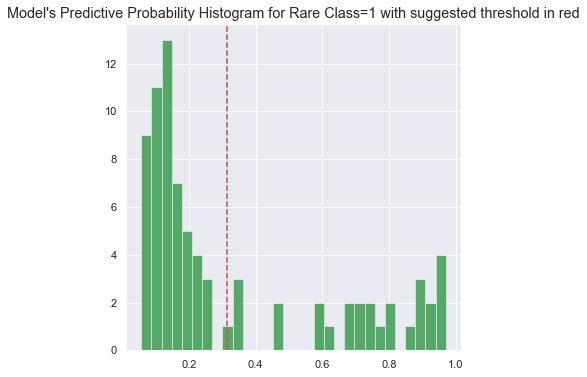

    Using threshold=0.5. However, 0.314 provides better F1=0.81 for rare class...
########################################################
XGBoost Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 85.0%
Balanced Accuracy = 82.85% with Threshold = 0.50
Confusion Matrix:
[[48  1]
 [10 21]]
              precision    recall  f1-score   support

           0       0.83      0.98      0.90        49
           1       0.95      0.68      0.79        31

    accuracy                           0.86        80
   macro avg       0.89      0.83      0.84        80
weighted avg       0.88      0.86      0.86        80

Balanced Accuracy = 84.63% with Threshold = 0.31
Confusion Matrix:
[[45  4]
 [ 7 24]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        49
           1       0.86      0.77      0.81        31

    accuracy                           0.86        80
   macro avg       0.86      0.85      0.85        

After multiple models, Ensemble Model Results:
Binary Class Model Metrics Report
#####################################################
    Accuracy          = 86.2%
    Balanced Accuracy = 84.0%
    Precision         = 88.5%
    Average Precision = 86.8%
    Recall            = 74.2%
    F1 Score          = 80.7%
#####################################################
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        49
           1       0.88      0.74      0.81        31

    accuracy                           0.86        80
   macro avg       0.87      0.84      0.85        80
weighted avg       0.86      0.86      0.86        80

[[46  3]
 [ 8 23]]
#############################################################################
Single Model is better than Ensembling Models for this data set.


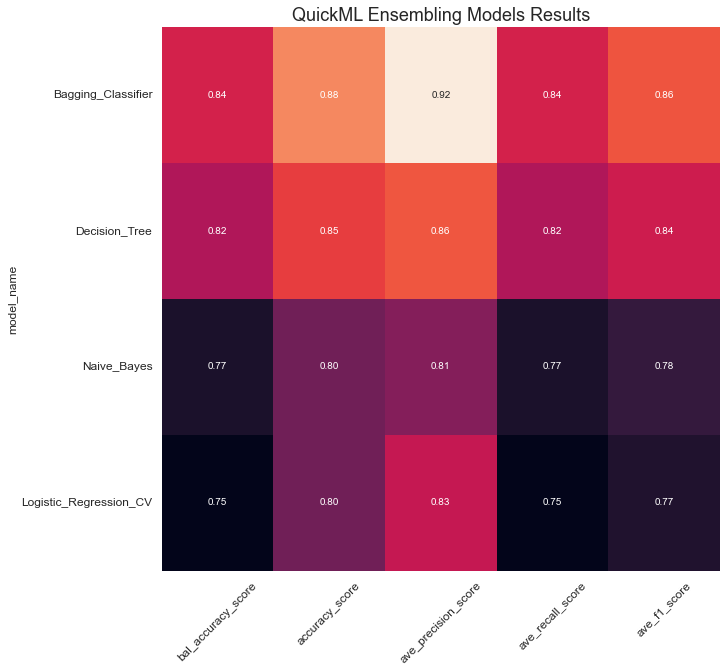

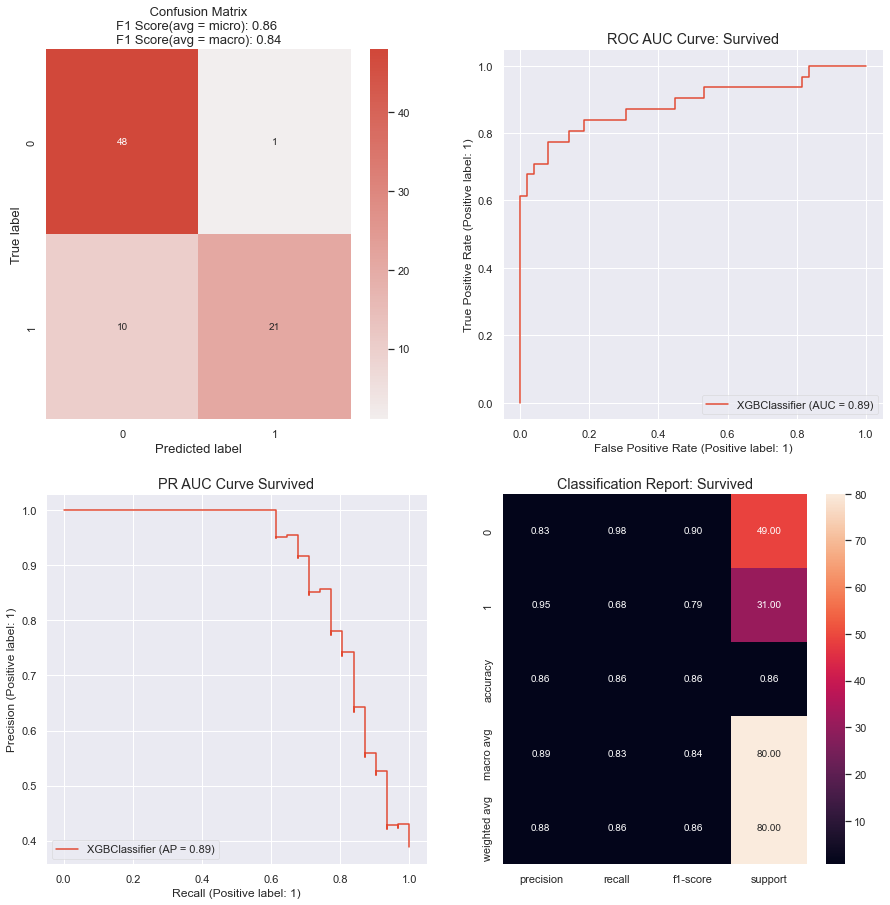

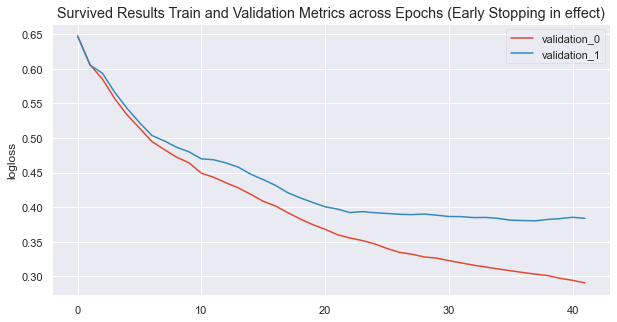

    Time taken for this Target (in seconds) = 26
    Binning_Flag set to False or there are no float vars in data set to be binned
Performing MinMax scaling of train and test data...
###########################################################################
#####   F I N A L I Z I N G   M O D E L   O N    F U L L   T R A I N  #####
###########################################################################
     Actual Training time taken in seconds = 0
Training of models completed. Now starting predictions on test data...
    Making test Data predictions using modified Threshold = 0.314
    Calculating weighted average ensemble of 5 classifiers
    Plotting Feature Importances to explain the output of model
############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 26
Writing Output files to disk...
    Saving predictions to .\Survived\Survived_Binary_Classification_test_modified.csv
    Saving predictions to .\Survi

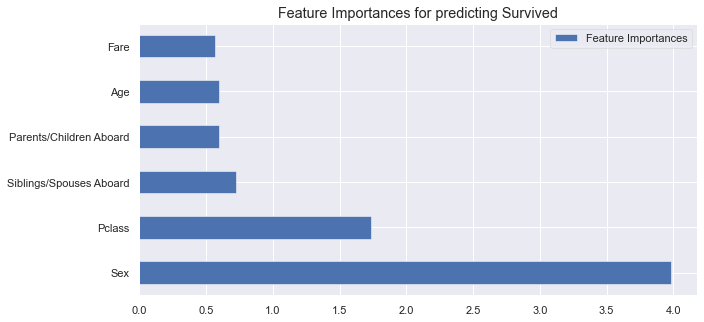

In [9]:
#### If Boosting_Flag = True => XGBoost, False => ExtraTrees, None => Linear Model
m, feats, trainm, testm = Auto_ViML(train=train,
                                    sample_submission='Sample_Submission.csv',
                                    test=test,
                                    target=target,
                                    scoring_parameter=scoring_parameter,
                                    hyper_param='GS',
                                    feature_reduction=True,
                                    KMeans_Featurizer=False,
                                    Boosting_Flag=True,
                                    Add_Poly=0,
                                    Stacking_Flag=False,
                                    Binning_Flag=False,
                                    Imbalanced_Flag=False,
                                    verbose=1
                                   )                      

In [10]:
def reverse_dict(map_dict):
    return dict([(v,k) for (k,v) in map_dict.items()])
# Use this to Test Classification Problems Only ####
ret_dict = {0: 0, 1: 1}
map_dict = reverse_dict(ret_dict)
m_thresh = 0.21
modelname='XGBoost'
#####################################################################
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score
try:
    print('Normal Balanced Accuracy = %0.2f%%' %(
        100*balanced_accuracy_score(test[target].map(map_dict).values, (
            testm[target+'_proba_'+'1']>0.5).astype(int).values)))
    print('Test results since target variable is present in test data:')
    print(confusion_matrix(test[target].map(map_dict).values, (
            testm[target+'_proba_'+'1']>0.5).astype(int).values))
    print(classification_report(test[target].map(map_dict).values, (
            testm[target+'_proba_'+'1']>0.5).astype(int).values))
    print('Modified Threshold Balanced Accuracy = %0.2f%%' %(
        100*balanced_accuracy_score(test[target].map(map_dict).values, (
            testm[target+'_proba_'+'1']>m_thresh).astype(int).values)))
    print(confusion_matrix(test[target].map(map_dict).values, (
            testm[target+'_proba_'+'1']>m_thresh).astype(int).values))
    print(classification_report(test[target].map(map_dict).values, (
            testm[target+'_proba_'+'1']>m_thresh).astype(int).values))
except:
    print('No target variable present in test data. No results')


Normal Balanced Accuracy = 82.25%
Test results since target variable is present in test data:
[[48  8]
 [ 7 26]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86        56
           1       0.76      0.79      0.78        33

    accuracy                           0.83        89
   macro avg       0.82      0.82      0.82        89
weighted avg       0.83      0.83      0.83        89

Modified Threshold Balanced Accuracy = 80.19%
[[44 12]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        56
           1       0.69      0.82      0.75        33

    accuracy                           0.80        89
   macro avg       0.79      0.80      0.79        89
weighted avg       0.81      0.80      0.80        89

